In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv ('Data_Startups.csv')

dataset = df.drop (['City'], axis = 1)


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values

In [4]:
X

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52,       nan, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [      nan, 135495.07, 252664.93],
       [119943.24, 156547.42,       nan],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [5]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

# Fill Missing

In [6]:
from sklearn.impute import SimpleImputer

imputa = SimpleImputer(missing_values= np.nan, strategy='mean')
imputa.fit(X[:, 0:3])

X[:, 0:3] = imputa.transform(X[:, 0:3])

In [7]:
print (X)

[[165349.2        136897.8        471784.1       ]
 [162597.7        151377.59       443898.53      ]
 [153441.51       101145.55       407934.54      ]
 [144372.41       118671.85       383199.62      ]
 [142107.34        91391.77       366168.42      ]
 [131876.9         99814.71       362861.36      ]
 [134615.46       147198.87       127716.82      ]
 [130298.13       145530.06       323876.68      ]
 [120542.52       121298.40416667 311613.29      ]
 [123334.88       108679.17       304981.62      ]
 [101913.08       110594.11       229160.95      ]
 [100671.96        91790.61       249744.55      ]
 [ 93863.75       127320.38       249839.44      ]
 [ 73958.7175     135495.07       252664.93      ]
 [119943.24       156547.42       210096.77489796]
 [114523.61       122616.84       261776.23      ]
 [ 78013.11       121597.55       264346.06      ]
 [ 94657.16       145077.58       282574.31      ]
 [ 91749.16       114175.79       294919.57      ]
 [ 86419.7        153514.11    

In [8]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer



# Create a label encoder for the categorical column (index 3)
labelencoder_X = LabelEncoder()
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])

# Specify the column(s) to one-hot encode, in this case, column 3 (index 3)
# You can add more columns to this list if needed.
columns_to_encode = [2]

# Create a column transformer
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), columns_to_encode)
    ],
    remainder='passthrough'  # Keep the remaining columns as is
)

X_encoded = ct.fit_transform(X)

In [9]:
X.astype(int)
y.astype(int)

array([192261, 191792, 191050, 182901, 166187, 156991, 156122, 155752,
       152211, 149759, 146121, 144259, 141585, 134307, 132602, 129917,
       126992, 125370, 124266, 122776, 118474, 111313, 110352, 108733,
       108552, 107404, 105733, 105008, 103282, 101004,  99937,  97483,
        97427,  96778,  96712,  96479,  90708,  89949,  81229,  81005,
        78239,  77798,  71498,  69758,  65200,  64926,  49490,  42559,
        35673,  14681])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state=0)


In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit (X_train, y_train)

LinearRegression()

In [12]:
y_pred = regressor.predict (X_test)

In [13]:
y_pred

array([107353.19870105, 128989.11830486, 131785.54540641,  69180.27681752,
       176947.43190684, 117296.56148844,  62287.78315016,  98979.20123754,
       116260.58600826, 166499.92376951])

In [14]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

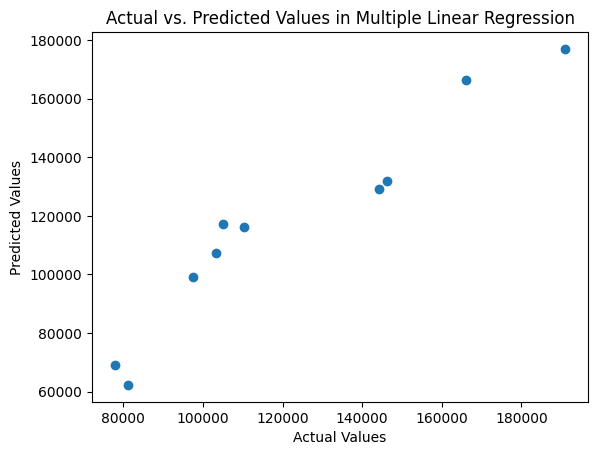

In [15]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values in Multiple Linear Regression")
plt.show()


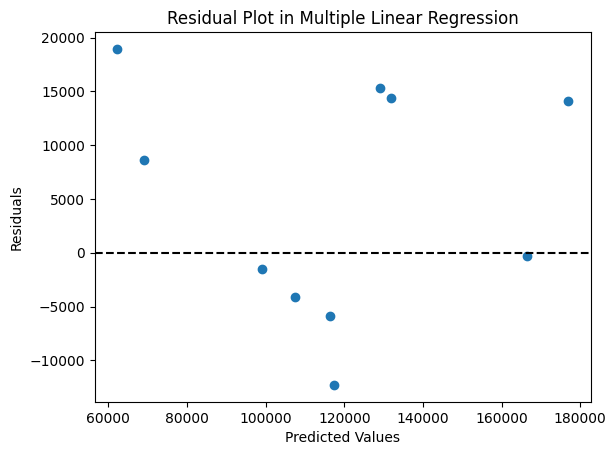

In [54]:
# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot in Multiple Linear Regression")
plt.axhline(y=0, color='k', linestyle='--')  # Adding a horizontal line at y=0
plt.show()


In [16]:
import pickle

pickle.dump (regressor, open('model.pkl', 'wb'))

In [20]:
model = pickle.load (open('model.pkl', 'rb'))
print (model.predict([[20, 39, 40]]))

[47390.67293812]
